In [78]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

import nltk
from nltk import *
from nltk.text import Text
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

## Data Exploration

In [17]:
file_path = "ESConv.json"

with open(file_path, "r", encoding="utf-8") as file:
    dataset = json.load(file)

In [18]:
# Access and print the first conversation
conversation = dataset[0]
print(conversation)

{'experience_type': 'Previous Experience', 'emotion_type': 'anxiety', 'problem_type': 'job crisis', 'situation': 'I hate my job but I am scared to quit and seek a new career.', 'survey_score': {'seeker': {'initial_emotion_intensity': '5', 'empathy': '5', 'relevance': '5', 'final_emotion_intensity': '1'}, 'supporter': {'relevance': '5'}}, 'dialog': [{'speaker': 'seeker', 'annotation': {}, 'content': 'Hello\n'}, {'speaker': 'supporter', 'annotation': {'strategy': 'Question'}, 'content': 'Hello, what would you like to talk about?'}, {'speaker': 'seeker', 'annotation': {}, 'content': 'I am having a lot of anxiety about quitting my current job. It is too stressful but pays well\n'}, {'speaker': 'supporter', 'annotation': {'strategy': 'Question'}, 'content': 'What makes your job stressful for you?'}, {'speaker': 'seeker', 'annotation': {'feedback': '5'}, 'content': 'I have to deal with many people in hard financial situations and it is upsetting \n'}, {'speaker': 'supporter', 'annotation': {

In [4]:
# Access specific fields within the first conversation
experience_type = conversation["experience_type"]
emotion_type = conversation["emotion_type"]
problem_type = conversation["problem_type"]
situation = conversation["situation"]
survey_score = conversation["survey_score"]
survey_score_seeker = conversation["survey_score"]["seeker"]
survey_score_supporter = conversation["survey_score"]["supporter"]
dialog = conversation["dialog"]

In [5]:
experience_type

'Previous Experience'

In [6]:
emotion_type

'anxiety'

In [7]:
problem_type

'job crisis'

In [8]:
situation

'I hate my job but I am scared to quit and seek a new career.'

In [9]:
survey_score

{'seeker': {'empathy': '5',
  'final_emotion_intensity': '1',
  'initial_emotion_intensity': '5',
  'relevance': '5'},
 'supporter': {'relevance': '5'}}

In [10]:
survey_score_seeker

{'empathy': '5',
 'final_emotion_intensity': '1',
 'initial_emotion_intensity': '5',
 'relevance': '5'}

In [11]:
survey_score_supporter

{'relevance': '5'}

In [12]:
dialog

[{'annotation': {}, 'content': 'Hello\n', 'speaker': 'seeker'},
 {'annotation': {'strategy': 'Question'},
  'content': 'Hello, what would you like to talk about?',
  'speaker': 'supporter'},
 {'annotation': {},
  'content': 'I am having a lot of anxiety about quitting my current job. It is too stressful but pays well\n',
  'speaker': 'seeker'},
 {'annotation': {'strategy': 'Question'},
  'content': 'What makes your job stressful for you?',
  'speaker': 'supporter'},
 {'annotation': {'feedback': '5'},
  'content': 'I have to deal with many people in hard financial situations and it is upsetting \n',
  'speaker': 'seeker'},
 {'annotation': {'strategy': 'Question'},
  'content': 'Do you help your clients to make it to a better financial situation?',
  'speaker': 'supporter'},
 {'annotation': {},
  'content': 'I do, but often they are not going to get back to what they want. Many people are going to lose their home when safeguards are lifted \n',
  'speaker': 'seeker'},
 {'annotation': {'s

In [13]:
dialog = conversation["dialog"]
for message in dialog:
    speaker = message["speaker"]
    content = message["content"]
    print(f"{speaker}: {content}")

seeker: Hello

supporter: Hello, what would you like to talk about?
seeker: I am having a lot of anxiety about quitting my current job. It is too stressful but pays well

supporter: What makes your job stressful for you?
seeker: I have to deal with many people in hard financial situations and it is upsetting 

supporter: Do you help your clients to make it to a better financial situation?
seeker: I do, but often they are not going to get back to what they want. Many people are going to lose their home when safeguards are lifted 

supporter: But you offer them a better future than what they have currently. It may not be what they wanted, but it helps them in the long run.
seeker: That is true but sometimes I feel like I should put my feelings and health first 

supporter: I can understand that. 
supporter: Is there another job that would pay you close to what you currently make?
seeker: Probably not. I was with the same company for a long time and I consistently get a bonus every year 


In [14]:
# Access the seeker's first question
seeker_question1 = conversation["seeker_question1"]
print("Seeker's question 1:", seeker_question1)

# Access the supporter's second question
supporter_question2 = conversation["supporter_question2"]
print("Supporter's question 2:", supporter_question2)

Seeker's question 1: Partner was very supportive
Supporter's question 2: 


In [5]:
def lexical_diversity(text):
    return len(text) / word_type(text)

# bogactwo lexicalne, kazde slowo jest uzywane srednio x razy

In [6]:
def percentage(word, text):
    count = text.count(word) # ile razy zostalo uzyte konkretne slowo
    return 100 * count / len(text)

In [7]:
def word_type(text):
    return len(set(text))
 # w taki sposob moge uzyskac statystyke ile przecietnie pojedynczych slow (word type) uzywa jeden czlowiek na rozmowe

In [73]:
dialog = conversation["dialog"]
first_conv = []
first_conv_str = ""
for message in dialog:
    speaker = message["speaker"]
    content = message["content"]
    if speaker == 'seeker':
        first_conv.append(content.split(' '))
        first_conv_str += content + " "
        
#words = ''.join(first_conv)
# Remove trailing whitespace
first_conv_str = first_conv_str.strip()

single_words_list = [item for sublist in first_conv for item in sublist]

In [65]:
first_conv

[['Hello\n'],
 ['I',
  'am',
  'having',
  'a',
  'lot',
  'of',
  'anxiety',
  'about',
  'quitting',
  'my',
  'current',
  'job.',
  'It',
  'is',
  'too',
  'stressful',
  'but',
  'pays',
  'well\n'],
 ['I',
  'have',
  'to',
  'deal',
  'with',
  'many',
  'people',
  'in',
  'hard',
  'financial',
  'situations',
  'and',
  'it',
  'is',
  'upsetting',
  '\n'],
 ['I',
  'do,',
  'but',
  'often',
  'they',
  'are',
  'not',
  'going',
  'to',
  'get',
  'back',
  'to',
  'what',
  'they',
  'want.',
  'Many',
  'people',
  'are',
  'going',
  'to',
  'lose',
  'their',
  'home',
  'when',
  'safeguards',
  'are',
  'lifted',
  '\n'],
 ['That',
  'is',
  'true',
  'but',
  'sometimes',
  'I',
  'feel',
  'like',
  'I',
  'should',
  'put',
  'my',
  'feelings',
  'and',
  'health',
  'first',
  '\n'],
 ['Probably',
  'not.',
  'I',
  'was',
  'with',
  'the',
  'same',
  'company',
  'for',
  'a',
  'long',
  'time',
  'and',
  'I',
  'consistently',
  'get',
  'a',
  'bonus',
  

In [66]:
single_words_list

['Hello\n',
 'I',
 'am',
 'having',
 'a',
 'lot',
 'of',
 'anxiety',
 'about',
 'quitting',
 'my',
 'current',
 'job.',
 'It',
 'is',
 'too',
 'stressful',
 'but',
 'pays',
 'well\n',
 'I',
 'have',
 'to',
 'deal',
 'with',
 'many',
 'people',
 'in',
 'hard',
 'financial',
 'situations',
 'and',
 'it',
 'is',
 'upsetting',
 '\n',
 'I',
 'do,',
 'but',
 'often',
 'they',
 'are',
 'not',
 'going',
 'to',
 'get',
 'back',
 'to',
 'what',
 'they',
 'want.',
 'Many',
 'people',
 'are',
 'going',
 'to',
 'lose',
 'their',
 'home',
 'when',
 'safeguards',
 'are',
 'lifted',
 '\n',
 'That',
 'is',
 'true',
 'but',
 'sometimes',
 'I',
 'feel',
 'like',
 'I',
 'should',
 'put',
 'my',
 'feelings',
 'and',
 'health',
 'first',
 '\n',
 'Probably',
 'not.',
 'I',
 'was',
 'with',
 'the',
 'same',
 'company',
 'for',
 'a',
 'long',
 'time',
 'and',
 'I',
 'consistently',
 'get',
 'a',
 'bonus',
 'every',
 'year',
 '',
 'I',
 'could',
 'try.',
 'It',
 'mostly',
 'gets',
 'to',
 'me',
 'at',
 'the',
 

In [68]:
single_word_list = [word.replace('\n', '').replace(',', '') for word in single_words_list]

In [69]:
set(single_words_list)

{'',
 '\n',
 'Bye\n',
 'Hello\n',
 'I',
 'It',
 'Many',
 'Maybe',
 'Probably',
 'Sometimes',
 'Thank',
 'Thanks',
 'That',
 'a',
 'about',
 'again',
 'also',
 'am',
 'and',
 'anxiety',
 'are',
 'at',
 'back',
 'big',
 'bonus',
 'but',
 'company',
 'consistently',
 'could',
 'current',
 'day',
 'deal',
 'decision',
 'different',
 'do,',
 'down',
 'end',
 'every',
 'feel',
 'feelings',
 'financial',
 'first',
 'for',
 'get',
 'gets',
 'going',
 'hard',
 'have',
 'having',
 'health',
 'home',
 'if',
 'in',
 'is',
 'it',
 'job.',
 'just',
 'lifted',
 'like',
 'long',
 'lose',
 'lot',
 'many',
 'me',
 'mostly',
 'my',
 'need',
 'not',
 'not.',
 'of',
 'often',
 'pays',
 'people',
 'perspective',
 'put',
 'quitting',
 'really',
 'safeguards',
 'same',
 'should',
 'sit',
 'situations',
 'sometimes',
 'stressful',
 'the',
 'their',
 'they',
 'think',
 'though',
 'time',
 'to',
 'too',
 'true',
 'true.',
 'try.',
 'upsetting',
 'want.',
 'was',
 'well\n',
 'what',
 'when',
 'with',
 'wonder',
 

In [70]:
len(sorted(set(single_words_list)))

105

In [71]:
word_type(single_words_list)

105

In [49]:
lexical_diversity(single_words_list)

1.619047619047619

In [51]:
percentage('I', single_words_list)

5.882352941176471

In [12]:
from nltk import FreqDist

In [52]:
fdist = FreqDist(single_words_list)

In [53]:
fdist.keys()

dict_keys(['Hello\n', 'I', 'am', 'having', 'a', 'lot', 'of', 'anxiety', 'about', 'quitting', 'my', 'current', 'job.', 'It', 'is', 'too', 'stressful', 'but', 'pays', 'well\n', 'have', 'to', 'deal', 'with', 'many', 'people', 'in', 'hard', 'financial', 'situations', 'and', 'it', 'upsetting', '\n', 'do,', 'often', 'they', 'are', 'not', 'going', 'get', 'back', 'what', 'want.', 'Many', 'lose', 'their', 'home', 'when', 'safeguards', 'lifted', 'That', 'true', 'sometimes', 'feel', 'like', 'should', 'put', 'feelings', 'health', 'first', 'Probably', 'not.', 'was', 'the', 'same', 'company', 'for', 'long', 'time', 'consistently', 'bonus', 'every', 'year', '', 'could', 'try.', 'mostly', 'gets', 'me', 'at', 'end', 'day', 'also', 'true.', 'Sometimes', 'wonder', 'if', 'really', 'though', 'Maybe', 'just', 'need', 'sit', 'down', 'think', 'big', 'decision', 'Thank', 'you', 'different', 'perspective', 'Thanks', 'again', 'Bye\n'])

In [58]:
fdist['when']

1

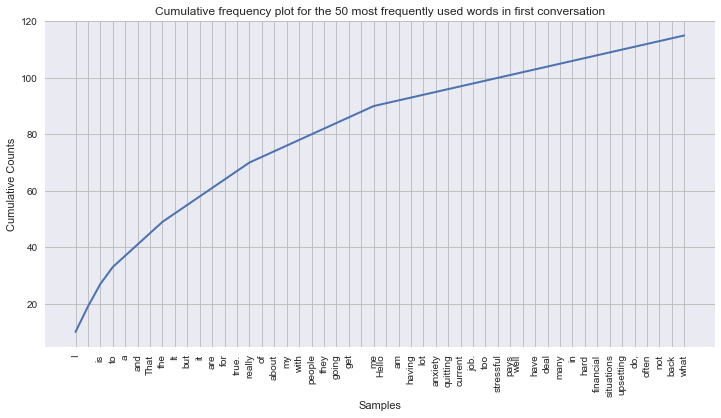

In [61]:
plt.figure(figsize=(12, 6))
plt.title('Cumulative frequency plot for the 50 most frequently used words in first conversation')
fdist.plot(50, cumulative=True)
# Cumulative

In [83]:
# Tokenize the string
first_conv_tokens = nltk.word_tokenize(first_conv_str)

# Create a Text object from the tokens
text = Text(first_conv_tokens)

In [86]:
text.concordance('what')

Displaying 1 of 1 matches:
en they are not going to get back to what they want . Many people are going to


In [88]:
text.similar('axiety')

No matches


In [89]:
#text.common_contexts(['',''])

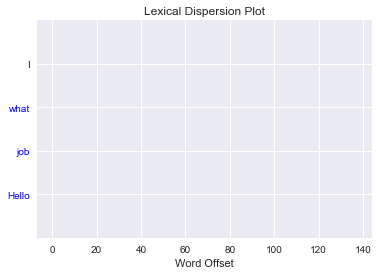

In [90]:
text.dispersion_plot(['I', 'what', 'job', 'Hello']) #za krotka konwersacja?

In [100]:
for dialog in dataset:
    if dataset[dialog]['experience_type']:
        for message in dataset[dialog]:
            speaker = message["speaker"]
            content = message["content"]
            if speaker == 'seeker':
                first_conv.append(content.split(' '))
                first_conv_str += content + " "
                
first_conv_str = first_conv_str.strip()

single_words_list = [item for sublist in first_conv for item in sublist]

TypeError: list indices must be integers or slices, not dict

## Data Preprocessing

In [15]:
# Convert JSON data to a DataFrame
import pandas as pd

df = pd.io.json.json_normalize(dataset)
print(df.head(5))

                                              dialog emotion_type  \
0  [{'speaker': 'seeker', 'annotation': {}, 'cont...      anxiety   
1  [{'speaker': 'supporter', 'annotation': {'stra...        anger   
2  [{'speaker': 'supporter', 'annotation': {'stra...         fear   
3  [{'speaker': 'supporter', 'annotation': {'stra...   depression   
4  [{'speaker': 'supporter', 'annotation': {'stra...   depression   

       experience_type           problem_type             seeker_question1  \
0  Previous Experience             job crisis  Partner was very supportive   
1   Current Experience  problems with friends                                
2   Current Experience             job crisis                           no   
3   Current Experience     ongoing depression                           No   
4   Current Experience   breakup with partner                Good exercise   

                            seeker_question2  \
0  More guidance in conversation or examples   
1                   

In [16]:
df.info() # different sizes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
dialog                                           1300 non-null object
emotion_type                                     1300 non-null object
experience_type                                  1300 non-null object
problem_type                                     1300 non-null object
seeker_question1                                 1300 non-null object
seeker_question2                                 1300 non-null object
situation                                        1300 non-null object
supporter_question1                              1300 non-null object
supporter_question2                              1300 non-null object
survey_score.seeker.empathy                      1150 non-null object
survey_score.seeker.final_emotion_intensity      1150 non-null object
survey_score.seeker.initial_emotion_intensity    1300 non-null object
survey_score.seeker.relevance                    1150

In [17]:
df.isnull().sum().sort_values(ascending=False)

survey_score.supporter.relevance                 185
survey_score.seeker.relevance                    150
survey_score.seeker.final_emotion_intensity      150
survey_score.seeker.empathy                      150
survey_score.seeker.initial_emotion_intensity      0
supporter_question2                                0
supporter_question1                                0
situation                                          0
seeker_question2                                   0
seeker_question1                                   0
problem_type                                       0
experience_type                                    0
emotion_type                                       0
dialog                                             0
dtype: int64

In [18]:
df.fillna(method="ffill")

,dialog,emotion_type,experience_type,problem_type,seeker_question1,seeker_question2,situation,supporter_question1,supporter_question2,survey_score.seeker.empathy,survey_score.seeker.final_emotion_intensity,survey_score.seeker.initial_emotion_intensity,survey_score.seeker.relevance,survey_score.supporter.relevance
0,"[{'speaker': 'seeker', 'annotation': {}, 'cont...",anxiety,Previous Experience,job crisis,Partner was very supportive,More guidance in conversation or examples,I hate my job but I am scared to quit and seek...,,,5,1,5,5,5
1,"[{'speaker': 'supporter', 'annotation': {'stra...",anger,Current Experience,problems with friends,,,I have complete unsupportive friends its to th...,It was simple,The middle screen hover function gets in the way,5,1,5,5,4
2,"[{'speaker': 'supporter', 'annotation': {'stra...",fear,Current Experience,job crisis,no,no,I have been out of work for five weeks in quar...,,,5,2,4,5,5
3,"[{'speaker': 'supporter', 'annotation': {'stra...",depression,Current Experience,ongoing depression,No,No,I am depressed staying home due to COVID,,,4,3,4,4,5
4,"[{'speaker': 'supporter', 'annotation': {'stra...",depression,Current Experience,breakup with partner,Good exercise,no,I found out that my boyfriend had been lying t...,,,4,4,5,5,5
5,"[{'speaker': 'supporter', 'annotation': {'stra...",anxiety,Current Experience,job crisis,no,no,the uncertainty surrounding the corona virus p...,,,4,4,5,4,3
6,"[{'speaker': 'supporter', 'annotation': {'stra...",anxiety,Current Experience,job crisis,no,no,I am looking for more online jobs. but it is h...,,,3,2,3,3,5
7,"[{'speaker': 'seeker', 'annotation': {}, 'cont...",depression,Current Experience,ongoing depression,,,General depression made worse by the severity ...,nothing,,3,3,4,3,5
8,"[{'speaker': 'seeker', 'annotation': {}, 'cont...",sadness,Current Experience,problems with friends,no,no,They are always demotivate my economic status....,,,3,3,4,3,5
9,"[{'speaker': 'supporter', 'annotation': {'stra...",disgust,Current Experience,breakup with partner,I didn't like that they didn't know the termin...,Get more progressive participants.,"I really blew it with my girlfriend, so she le...",The conversation was very hard to gain a solid...,everything is great.,3,3,4,2,2


In [19]:
for col in df:
    if type(df[col]) == 'object':
        df[col] = df[col].fillna(value='unknown')
    else:
        df[col] =df[col].fillna(value=0)

In [20]:
df.isnull().sum().sum()

0

# Columns

In [21]:
df['emotion_type'].value_counts()

anxiety        354
depression     334
sadness        308
anger          111
fear            95
shame           42
disgust         40
nervousness     13
guilt            1
pain             1
jealousy         1
Name: emotion_type, dtype: int64

In [22]:
df['experience_type'].value_counts()

Current Experience     991
Previous Experience    309
Name: experience_type, dtype: int64

In [23]:
df['problem_type'].value_counts()

ongoing depression       351
job crisis               280
breakup with partner     239
problems with friends    179
academic pressure        156
Sleep Problems            28
Procrastination           13
Appearance Anxiety        12
Alcohol Abuse             12
conflict with parents     10
Issues with Children      10
Issues with Parents        8
School Bullying            2
Name: problem_type, dtype: int64

In [24]:
df['survey_score.seeker.empathy'].value_counts() # 1-5

5    730
4    295
0    150
3    114
2      7
1      4
Name: survey_score.seeker.empathy, dtype: int64

In [25]:
df['survey_score.seeker.final_emotion_intensity'].value_counts() # 1-4

2    469
1    329
3    290
0    150
4     62
Name: survey_score.seeker.final_emotion_intensity, dtype: int64

In [26]:
df['survey_score.seeker.initial_emotion_intensity'].value_counts() 
# 1-5 # good to show in pair: initial and final emotion intensity

4    567
5    427
3    267
2     37
1      2
Name: survey_score.seeker.initial_emotion_intensity, dtype: int64

In [27]:
df['survey_score.seeker.relevance'].value_counts() # 2-5

5    790
4    272
0    150
3     79
2      9
Name: survey_score.seeker.relevance, dtype: int64

In [28]:
df['survey_score.supporter.relevance'].value_counts() # 0-5

5    901
0    185
4    152
3     43
2     12
0      4
1      3
Name: survey_score.supporter.relevance, dtype: int64

# Dialog

In [29]:
df['dialog'] # dialogs from whole dataset

0       [{'speaker': 'seeker', 'annotation': {}, 'cont...
1       [{'speaker': 'supporter', 'annotation': {'stra...
2       [{'speaker': 'supporter', 'annotation': {'stra...
3       [{'speaker': 'supporter', 'annotation': {'stra...
4       [{'speaker': 'supporter', 'annotation': {'stra...
5       [{'speaker': 'supporter', 'annotation': {'stra...
6       [{'speaker': 'supporter', 'annotation': {'stra...
7       [{'speaker': 'seeker', 'annotation': {}, 'cont...
8       [{'speaker': 'seeker', 'annotation': {}, 'cont...
9       [{'speaker': 'supporter', 'annotation': {'stra...
10      [{'speaker': 'supporter', 'annotation': {'stra...
11      [{'speaker': 'supporter', 'annotation': {'stra...
12      [{'speaker': 'seeker', 'annotation': {}, 'cont...
13      [{'speaker': 'supporter', 'annotation': {'stra...
14      [{'speaker': 'seeker', 'annotation': {}, 'cont...
15      [{'speaker': 'seeker', 'annotation': {}, 'cont...
16      [{'speaker': 'supporter', 'annotation': {'stra...
17      [{'spe

In [30]:
df['dialog'][0] # 1st dialog

[{'annotation': {}, 'content': 'Hello\n', 'speaker': 'seeker'},
 {'annotation': {'strategy': 'Question'},
  'content': 'Hello, what would you like to talk about?',
  'speaker': 'supporter'},
 {'annotation': {},
  'content': 'I am having a lot of anxiety about quitting my current job. It is too stressful but pays well\n',
  'speaker': 'seeker'},
 {'annotation': {'strategy': 'Question'},
  'content': 'What makes your job stressful for you?',
  'speaker': 'supporter'},
 {'annotation': {'feedback': '5'},
  'content': 'I have to deal with many people in hard financial situations and it is upsetting \n',
  'speaker': 'seeker'},
 {'annotation': {'strategy': 'Question'},
  'content': 'Do you help your clients to make it to a better financial situation?',
  'speaker': 'supporter'},
 {'annotation': {},
  'content': 'I do, but often they are not going to get back to what they want. Many people are going to lose their home when safeguards are lifted \n',
  'speaker': 'seeker'},
 {'annotation': {'s

In [31]:
df['dialog'][0][0] # one statement with all information about who is talking etc.

{'annotation': {}, 'content': 'Hello\n', 'speaker': 'seeker'}

In [32]:
df['dialog'][0][0]['content'] # one statement

'Hello\n'

In [33]:
df['dialog'][0][1]['content']

'Hello, what would you like to talk about?'

In [34]:
statement = df['dialog'][0]

for i in statement:
    print(i['content'])

Hello

Hello, what would you like to talk about?
I am having a lot of anxiety about quitting my current job. It is too stressful but pays well

What makes your job stressful for you?
I have to deal with many people in hard financial situations and it is upsetting 

Do you help your clients to make it to a better financial situation?
I do, but often they are not going to get back to what they want. Many people are going to lose their home when safeguards are lifted 

But you offer them a better future than what they have currently. It may not be what they wanted, but it helps them in the long run.
That is true but sometimes I feel like I should put my feelings and health first 

I can understand that. 
Is there another job that would pay you close to what you currently make?
Probably not. I was with the same company for a long time and I consistently get a bonus every year 
Is it possible to reframe how you look at your clients' dire financial situations?
I could try. It mostly gets to 

In [35]:
# remove punctuation
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [36]:
df['dialog'][0][0]['content']

'Hello\n'

In [37]:
for conversation in df['dialog']:
    for single_conversation in conversation:
        single_conv = single_conversation['content']

In [38]:
single_conv = single_conv.apply(lambda x: remove_punctuation(x))
single_conv.head()

AttributeError: 'str' object has no attribute 'apply'

# Lexical Dispersion Plot

In [49]:
first_conv = ''
for conversation in df['dialog']:
    for single_conversation in conversation:
        single_conv = single_conversation['content']
        first_conv += single_conv

In [52]:
first_conv

# Convert the string to an NLTK text object
text_object = nltk.Text(nltk.word_tokenize(first_conv))

# Create the ConcordanceIndex
concordance_index = nltk.ConcordanceIndex(text_object)

AttributeError: 'ConcordanceIndex' object has no attribute 'find_concordance'

In [ ]:
file.close()